In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from IPython.display import display

In [2]:
%run ../database.ipynb

In [3]:
df = pd.DataFrame(get_all_image_mapping())

In [4]:
df["resnet_similarity_score_mean"] = df["resnet_similarity_score"].mean()
df["resnet_similarity_score_std"] = df["resnet_similarity_score"].std()

df["dinov2_similarity_score_mean"] = df["dinov2_similarity_score"].mean()
df["dinov2_similarity_score_std"] = df["dinov2_similarity_score"].std()

df["ssim_similarity_score_mean"] = df["ssim_similarity_score"].mean()
df["ssim_similarity_score_std"] = df["ssim_similarity_score"].std()

In [9]:
df["resnet_similarity_score_threshold"] = df["resnet_similarity_score_mean"] + df["resnet_similarity_score_std"]
df["dinov2_similarity_score_threshold"] = df["dinov2_similarity_score_mean"] + df["dinov2_similarity_score_std"]
df["ssim_similarity_score_threshold"] = df["ssim_similarity_score_mean"] + df["ssim_similarity_score_std"]

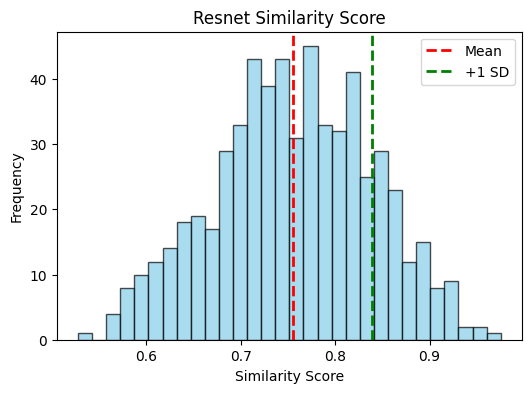

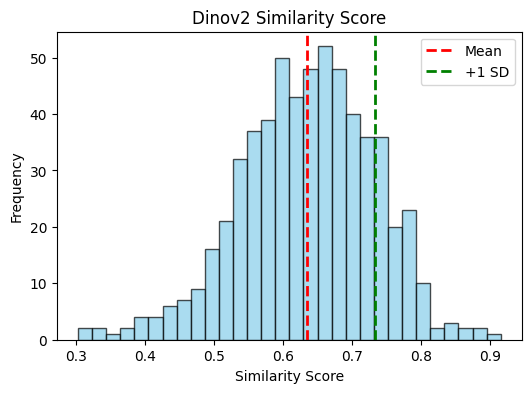

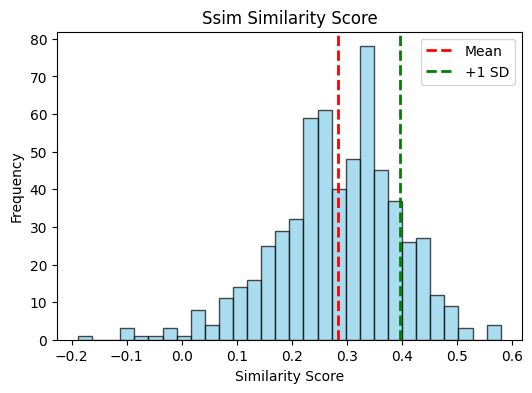

In [ ]:
similarity_metrics = ["resnet_similarity_score", "dinov2_similarity_score", "ssim_similarity_score"]

for metric in similarity_metrics:
    plt.figure(figsize=(6, 4))
    plt.hist(df[metric], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    mean = df[f"{metric}_mean"].iloc[0]
    high_threshold = df[f"{metric}_threshold"].iloc[0]

    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label="Mean")
    plt.axvline(high_threshold, color='green', linestyle='dashed', linewidth=2, label="+1 SD")

    plt.title(metric.replace("_", " ").title())
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.legend()

    plt.show()


In [ ]:
resnet_above = (df["resnet_similarity_score"] > df["resnet_similarity_score_threshold"]).sum()
dinov2_above = (df["dinov2_similarity_score"] > df["dinov2_similarity_score_threshold"]).sum()
ssim_above = (df["ssim_similarity_score"] > df["ssim_similarity_score_threshold"]).sum()

print(f"ResNet-152: {resnet_above} rows above threshold")
print(f"DINOv2: {dinov2_above} rows above threshold")
print(f"SSIM: {ssim_above} rows above threshold")

ResNet-152: 103 rows above threshold
DINOv2: 97 rows above threshold
SSIM: 88 rows above threshold


In [ ]:
df_higher_threshold = df[
    (df["resnet_similarity_score"] > df["resnet_similarity_score_threshold"]) &
    (df["dinov2_similarity_score"] > df["dinov2_similarity_score_threshold"]) &
    (df["ssim_similarity_score"] > df["ssim_similarity_score_threshold"])
]

Pair 2:


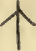

Pair 3:


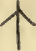

Pair 33:


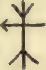

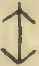

Pair 81:


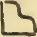

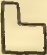

Pair 103:


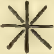

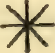

Pair 124:


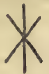

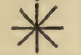

Pair 131:


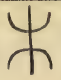

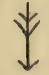

Pair 132:


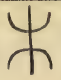

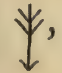

Pair 136:


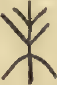

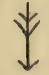

Pair 137:


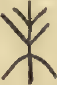

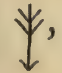

Pair 138:


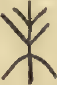

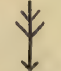

Pair 141:


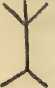

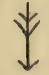

Pair 143:


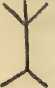

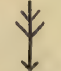

Pair 197:


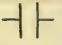

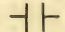

In [ ]:
for index, row in df_higher_threshold.iterrows():
    print(f"Pair {index + 1}:")
    
    chinese_image = Image.open(BytesIO(row["chinese_image"]))
    sumerian_image = Image.open(BytesIO(row["sumerian_image"]))

    display(chinese_image)
    display(sumerian_image)

In [12]:
all_above = ((df["resnet_similarity_score"] > df["resnet_similarity_score_threshold"]) & (df["dinov2_similarity_score"] > df["dinov2_similarity_score_threshold"]) & (df["ssim_similarity_score"] > df["ssim_similarity_score_threshold"]))

In [13]:
all_above.sum()

14

In [24]:
resnet_dinov2_above = ((df["resnet_similarity_score"] > df["resnet_similarity_high_threshold"]) & (df["dinov2_similarity_score"] > df["dinov2_similarity_high_threshold"])).sum()

In [25]:
resnet_dinov2_above

45